# Regression and Other Stories: Earnings

In [1]:
import arviz as az
from bambi import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Load data

In [2]:
earnings = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv")
earn = earnings["earn"]

### Median of women’s earnings, divided by the median of men’s earnings

In [3]:
# We coerce this column to a bool to make filtering easier below
male = earnings["male"].astype(bool)

ratio = earn[~male].median() / earn[male].median()
ratio

0.6

### A single bootstrap sample

In [10]:
n = earnings.shape[0]
earn_boot = earnings.sample(n, replace=True)
#earn_boot = boot["earn"]
#male_boot = boot["male"]
ratio_boot = earn_boot[earn_boot["male"]==0].median() / earn_boot[earn_boot["male"]==1].median()
ratio_boot["earn"]

0.6

### Summarize the results graphically and numerically

In [11]:
# Well coerce once to make things easier
earnings["male"] = earnings["male"].astype(bool)

def boot_ratio(data):
    n_rows = data.shape[0]
    boot = earnings.sample(n_rows, replace=True)
    
    earn_boot = boot["earn"]
    male_boot = boot["male"]

    
    ratio = earn_boot[~male_boot].median() / earn_boot[male_boot].median()
    return ratio
n_sims = 10000
output = np.array([boot_ratio(earnings) for _ in range(n_sims)])


0.02776133694233123


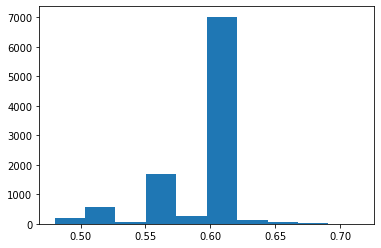

In [12]:
print(output.std())
fig, ax = plt.subplots()
ax.hist(output);

In [13]:
output.std()

0.02776133694233123